In [69]:
#import libraries
#importing BeautifulSoup to be able to read the HTML from the website 
#importing requests to be able to request the URL
#importing pandas, to be able to create/manipulate the dataframes 
from bs4 import BeautifulSoup
import requests
import pandas as pd


In [70]:
#Sport teams dictionary, to be able to have the urls by the gender and sport team
#This makes it easier when writing code to be able to sort and configure the data  
#Took off the Mens Lewis Volleyball Team and the corresponding womens Volleyball Team 
sports_teams = { 
                  'mens_volleyball' : ['https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster', 'https://ccnyathletics.com/sports/mens-volleyball/roster'
,'https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster', 'https://johnjayathletics.com/sports/mens-volleyball/roster', 'https://mecathletics.com/sports/mens-volleyball/roster' ,
'https://www.huntercollegeathletics.com/sports/mens-volleyball/roster', 'https://yorkathletics.com/sports/mens-volleyball/roster' , 'https://ballstatesports.com/sports/mens-volleyball/roster' , ]
    ,
                  'womens_volleyball' : ['https://bmccathletics.com/sports/womens-volleyball/roster', 'https://yorkathletics.com/sports/womens-volleyball/roster' , 'https://hostosathletics.com/sports/womens-volleyball/roster', 'https://bronxbroncos.com/sports/womens-volleyball/roster/2021', 'https://queensknights.com/sports/womens-volleyball/roster', 'https://augustajags.com/sports/wvball/roster', 'https://flaglerathletics.com/sports/womens-volleyball/roster','https://pacersports.com/sports/womens-volleyball/roster' , 'https://www.golhu.com/sports/womens-volleyball/roster'
 ] , 
                    'mens_swimming' : ['https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster','https://csidolphins.com/sports/mens-swimming-and-diving/roster','https://yorkathletics.com/sports/mens-swimming-and-diving/roster', 'https://athletics.baruch.cuny.edu/sports/mensswimming-and-diving/roster' , 'https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster' , 'https://mckbearcats.com/sports/mens-swimming-and-diving/roster', 'https://ramapoathletics.com/sports/mens-swimming-and-diving/roster' , 'https://oneontaathletics.com/sports/mens-swimming-and-diving/roster', 'https://bubearcats.com/sports/mens-swimming-and-diving/roster/2021-22', 'https://albrightathletics.com/sports/mens-swimming-and-diving/roster'

] , 
                   'womens_swimming' : ['https://csidolphins.com/sports/womens-swimming-and-diving/roster','https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?path=wswim', 'https://yorkathletics.com/sports/womens-swimming-and-diving/roster', 'https://queensknights.com/sports/womens-swimming-and-diving/roster', 'https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster' , 'https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster', 'https://mckbearcats.com/sports/womens-swimming-and-diving/roster' , 'https://ramapoathletics.com/sports/womens-swimming-and-diving/roster' , 'https://keanathletics.com/sports/womens-swimming-and-diving/roster' , 'https://oneontaathletics.com/sports/womens-swimming-and-diving/roster'
]
    

                }

In [71]:
#Creating a function to scrape the url by the team type and for each URL
def scraping_processing(team_type, urls):
  #Creating an empty lists to be able to add the names and numerical heights
  names = []
  numerical_heights = []

#For loop, to go through each URL set, and grab each url one by one 
#For loop, to iterate through each URL within the URLS that we have listed 
#making the request to get the url
  for url in urls:
    page = requests.get(url)
  
#Calling the BeautifulSoup, and grabbing the page.content in 'HTML' format using the html.parser 
    soup = BeautifulSoup(page.content, 'html.parser')

    #After obtaining the page.content under soup, we located each 'td' tag for the 
    ##table value of where the class is referencing to the height of the athlete
    raw_heights = soup.find_all('td', class_ = 'height')

    #To obtain the names, sort of the same way just changing the class
    ##Find the 'td' tag and specify the class to obtain the player name
    raw_names = soup.find_all('td', class_ ='sidearm-table-player-name ')

#Create a loop to grab each one of the names and append it to the list
    for raw_name in raw_names:
      names.append(raw_name.get_text().strip())

#Create a loop to grab each height, obtain the height and split it by the dash 
##Then we have to use the index[0] of the height and multiply it by 12 to obtain feet
###Then we have to specify that the index[2] is our inches 
###Lastly we add the feet and inches to the total height. 

    for raw_height in raw_heights:
      #print(raw_height.get_text())
      x = raw_height.get_text()
      if x == '-':
        continue
      feet = float(x.split('-')[0]) * 12
      inches = float(x.split('-')[1])

      total = feet + inches 

      numerical_heights.append(total)




#This is necessary to see when the heights df is greater than the names df
#This helps us to not have a unproportionate data values for each df 
  if ((len(names)) > len(numerical_heights)):
        for z in range(0, len(names) - len(numerical_heights)):
            numerical_heights.append(sum(numerical_heights) / len(numerical_heights))

  print(team_type)

 #filename is each to what we would like the name to be 
  filename = team_type + '.csv'

#part of the function is to also create a df for each where the columns of the dataframe will be name and heights 
#Then to able to download the csv file, we call it by the file name and index it
  df = pd.DataFrame()
  df['name'] = names
  df['heights'] = numerical_heights
  df.to_csv(filename, index=False)
  return df

In [72]:
#Utilizing the scraping_processing function for each team_type and 
##embedding it into a df identifying it by the team_type name
mens_volleyball_df = scraping_processing('mens_volleyball', sports_teams['mens_volleyball'])
womens_volleyball_df = scraping_processing('womens_volleyball', sports_teams['womens_volleyball'])
mens_swimming_df = scraping_processing('mens_swimming', sports_teams['mens_swimming'])
womens_swimming_df=scraping_processing('womens_swimming', sports_teams['womens_swimming'])

mens_volleyball
womens_volleyball
mens_swimming
womens_swimming


In [73]:
#This then grabs the value and the key for each one of the sport teams in the dictionary 
# and uses the scrapping processing function
for key, value in sports_teams.items():
  scraping_processing(key, value  )

mens_volleyball
womens_volleyball
mens_swimming
womens_swimming


In [74]:
mens_volleyball_df

,name,heights
0,Wen Cheung,69.0
1,Naoki Tani,67.0
2,Jack Centeno,73.0
3,Travis Goding,70.0
4,Aleksandr Howard,76.0
...,...,...
92,Brandon Shepherd,74.0
93,Kevin Doran,79.0
94,Sammy Adkisson,69.0
95,Lucas Biondi,78.0


In [75]:
womens_volleyball_df

,name,heights
0,Jaylina Kraker,59.0
1,Kaylin Nieves,62.0
2,Alyssa Duran,65.0
3,Vielka De Jesus Segura,67.0
4,Nolverys Fernandez,65.0
...,...,...
109,Hannah Lingold,70.0
110,Meghan Tennant,75.0
111,Samantha Arens-Ennis,65.0
112,Krystal Heffelfinger,71.0


In [86]:
mens_swimming_df

,name,heights
0,Ronaldo Barrios,74.000000
1,David Greenwald,72.000000
2,Christian Hoyek,64.000000
3,Eric Li,65.000000
4,Joseph Scarpetta,68.000000
...,...,...
149,Kieran Hassard,72.000000
150,Anthony Laite,73.000000
151,Drew MacDonald,75.000000
152,Kyle Morken,71.605263


In [77]:
womens_swimming_df

,name,heights
0,Kathleen Bridgman,65.0
1,Angye Galan,68.0
2,Jessica Johnson,67.0
3,Macy Jones-Busch,64.0
4,Bridget Mulvey,63.0
...,...,...
140,Paige Splendido,65.7
141,Emma Stephenson,65.7
142,Callie Stinson,65.7
143,Jessie Triller,65.7


In [78]:
#Here we obtain the average for each one of the sports team 
##We obtain this by achieving the mean of each of the heights 
###Which we then create a data frame from the team type and the average
mens_volleyball_avg = mens_volleyball_df['heights'].mean()
womens_volleyball_avg = womens_volleyball_df['heights'].mean()
mens_swimming_avg = mens_swimming_df['heights'].mean()
womens_swimming_avg=womens_swimming_df['heights'].mean()

average_heights = pd.DataFrame(
                                        {
                                            'team type': ['mens volleyball team', 'womens volleyball team', 'mens_swimming','womens_swimming'],
                                            'avg': [mens_volleyball_avg, womens_volleyball_avg,mens_swimming_avg,womens_swimming_avg]

                                        }
                               )

In [79]:
average_heights

,team type,avg
0,mens volleyball team,72.536082
1,womens volleyball team,67.157895
2,mens_swimming,71.605263
3,womens_swimming,65.700000


In [129]:
#Here we create open lists and from the dataframes obtain the largest and smallest values
#which would correspond to the smallest and tallest athletes 
Tallest_Men_Swimming=[]
Tallest_Men_Swimming=mens_swimming_df.nlargest(n=5,columns=['heights'],)
print(f'Tallest Men Swimming\n{Tallest_Men_Swimming}')

Shortest_Men_Swimming=[]
Shortest_Men_Swimming=mens_swimming_df.nsmallest(n=5,columns=['heights'],)
print(f'Shortest Men Swimming\n{Shortest_Men_Swimming}')

Tallest_Men_Volleyball=[]
Tallest_Men_Volleyball=mens_volleyball_df.nlargest(n=5,columns=['heights'],)
print(f'Tallest Men Volleyball\n{Tallest_Men_Volleyball}')

Shortest_Men_Volleyball=[]
Shortest_Men_Volleyball=mens_volleyball_df.nsmallest(n=5,columns=['heights'],)
print(f'Shortest Men Volleyball\n{Shortest_Men_Volleyball}')




Tallest Men Swimming
                       name  heights
60   Leo Gandaria-Hernandez     78.0
94              Tyler Moore     78.0
23             Ryan Boeding     77.0
35         Vincent Jaworski     77.0
129         Sandon Karinsky     77.0
Shortest Men Swimming
                 name  heights
2     Christian Hoyek     64.0
6       Daniel Angulo     64.0
3             Eric Li     65.0
84        Caleb Baron     65.0
107  Anthony Genovese     66.0
Tallest Men Volleyball
                  name  heights
87      Mark Wickstrom     81.0
89          Will Hippe     80.0
14         Akil Vaughn     79.0
85  Angelos Mandilaris     79.0
93         Kevin Doran     79.0
Shortest Men Volleyball
             name  heights
37  Bryce Glasper     64.0
25   Darren Roach     66.0
54      Bryan Eng     66.0
56    Andrew Reza     66.0
1      Naoki Tani     67.0


In [128]:
Tallest_Women_Swimming=[]
Tallest_Women_Swimming=womens_swimming_df.nlargest(n=5,columns=['heights'],)
print(f'Tallest Women Swimming\n{Tallest_Women_Swimming}')

Shortest_Women_Swimming=[]
Shortest_Women_Swimming=womens_swimming_df.nsmallest(n=5,columns=['heights'],)
print(f'Shortest Women Swimming\n{Shortest_Women_Swimming}')

Tallest_Women_Volleyball=[]
Tallest_Women_Volleyball=womens_volleyball_df.nlargest(n=5,columns=['heights'],)
print(f'Tallest Women Volleyball\n{Tallest_Women_Volleyball}')

Shortest_Women_Volleyball=[]
Shortest_Women_Volleyball=womens_volleyball_df.nsmallest(n=5,columns=['heights'],)
print(f'Shortest Women Volleyball\n{Shortest_Women_Volleyball}')

Tallest Women Swimming
               name  heights
40       Wendy Daza     72.0
50    Elle Christie     71.0
81    Lexie Winnett     71.0
84  Camryn Anderson     71.0
89     Hallie Dixon     71.0
Shortest Women Swimming
                 name  heights
21    Hancell De Sosa     59.0
33      Jillian Etnel     59.0
66     Chloe  Pearson     60.0
9   Scarlet Astudillo     61.0
24      Micaela Reyes     61.0
Tallest Women Volleyball
                name  heights
75        Molly Boyd     75.0
107     Alyssa Daley     75.0
110   Meghan Tennant     75.0
71      Logan Garcia     74.0
73   McKenzie  Eaves     74.0
Shortest Women Volleyball
               name  heights
0    Jaylina Kraker     59.0
20   Yeralkis Gomez     59.0
32  Kenndy  Vasquez     59.0
14   Kiara Gonzalez     60.0
23  Ariana  Serrano     60.0


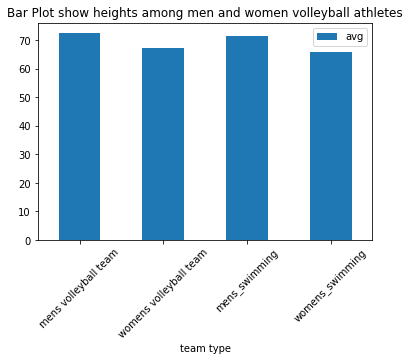

In [82]:
#Here we show the distribution amoung the teams 
average_heights.plot.bar(x ='team type', y = 'avg', rot= 45, title ='Bar Plot show heights among men and women volleyball athletes')